## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  10.289520   319.906606  0.078507   3.431539  1.095931
1  49.879215   619.384372  0.821147   1.736127  1.639421
2  60.944338  1646.056708  0.801870   5.197876  1.591440
3  22.491491   624.465504  0.372342   4.442795  1.483259
4   0.062051   745.066678  0.894322  10.319682  1.433147


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.06003 | train_mse: 8.02502 | train_mae: 1.8085  |  0:00:00s
epoch 1  | loss: 0.7817  | train_mse: 5.37796 | train_mae: 1.6653  |  0:00:00s
epoch 2  | loss: 0.58175 | train_mse: 2.6888  | train_mae: 1.2531  |  0:00:00s


epoch 3  | loss: 0.78346 | train_mse: 1.72679 | train_mae: 0.96456 |  0:00:00s
epoch 4  | loss: 0.43103 | train_mse: 1.44346 | train_mae: 0.87973 |  0:00:00s
epoch 5  | loss: 0.45706 | train_mse: 1.23556 | train_mae: 0.80384 |  0:00:00s


epoch 6  | loss: 0.33388 | train_mse: 1.34351 | train_mae: 0.88213 |  0:00:00s
epoch 7  | loss: 0.28964 | train_mse: 1.61897 | train_mae: 0.98135 |  0:00:00s
epoch 8  | loss: 0.30764 | train_mse: 1.89946 | train_mae: 1.10349 |  0:00:00s


epoch 9  | loss: 0.44411 | train_mse: 1.64937 | train_mae: 1.02813 |  0:00:01s
epoch 10 | loss: 0.19881 | train_mse: 1.49552 | train_mae: 0.967   |  0:00:01s
epoch 11 | loss: 0.24553 | train_mse: 1.32092 | train_mae: 0.86707 |  0:00:01s


epoch 12 | loss: 0.28907 | train_mse: 0.92537 | train_mae: 0.74558 |  0:00:01s
epoch 13 | loss: 0.21208 | train_mse: 0.84823 | train_mae: 0.7019  |  0:00:01s


epoch 14 | loss: 0.2365  | train_mse: 0.62302 | train_mae: 0.61577 |  0:00:01s
epoch 15 | loss: 0.17077 | train_mse: 0.38878 | train_mae: 0.49811 |  0:00:01s
epoch 16 | loss: 0.20521 | train_mse: 0.37766 | train_mae: 0.50446 |  0:00:01s


epoch 17 | loss: 0.25957 | train_mse: 0.49466 | train_mae: 0.56546 |  0:00:01s
epoch 18 | loss: 0.18573 | train_mse: 0.38    | train_mae: 0.51059 |  0:00:01s
epoch 19 | loss: 0.21084 | train_mse: 0.281   | train_mae: 0.4265  |  0:00:01s


epoch 20 | loss: 0.16827 | train_mse: 0.38383 | train_mae: 0.48538 |  0:00:02s
epoch 21 | loss: 0.18167 | train_mse: 0.38086 | train_mae: 0.50524 |  0:00:02s
epoch 22 | loss: 0.474   | train_mse: 0.38052 | train_mae: 0.50423 |  0:00:02s


epoch 23 | loss: 0.23122 | train_mse: 0.41449 | train_mae: 0.5138  |  0:00:02s
epoch 24 | loss: 0.17211 | train_mse: 0.43514 | train_mae: 0.50781 |  0:00:02s
epoch 25 | loss: 0.18923 | train_mse: 0.34236 | train_mae: 0.4499  |  0:00:02s


epoch 26 | loss: 0.14854 | train_mse: 0.35186 | train_mae: 0.45829 |  0:00:02s
epoch 27 | loss: 0.15508 | train_mse: 0.45894 | train_mae: 0.52737 |  0:00:02s
epoch 28 | loss: 0.16002 | train_mse: 0.36157 | train_mae: 0.47329 |  0:00:02s


epoch 29 | loss: 0.11759 | train_mse: 0.34345 | train_mae: 0.46272 |  0:00:02s
epoch 30 | loss: 0.13983 | train_mse: 0.29022 | train_mae: 0.4256  |  0:00:02s
epoch 31 | loss: 0.15209 | train_mse: 0.25549 | train_mae: 0.40973 |  0:00:02s


epoch 32 | loss: 0.16111 | train_mse: 0.21606 | train_mae: 0.38626 |  0:00:03s
epoch 33 | loss: 0.15768 | train_mse: 0.16958 | train_mae: 0.33791 |  0:00:03s
epoch 34 | loss: 0.13322 | train_mse: 0.11736 | train_mae: 0.26723 |  0:00:03s


epoch 35 | loss: 0.23862 | train_mse: 0.17683 | train_mae: 0.28071 |  0:00:03s
epoch 36 | loss: 0.16023 | train_mse: 0.23936 | train_mae: 0.29996 |  0:00:03s
epoch 37 | loss: 0.189   | train_mse: 0.11044 | train_mae: 0.26794 |  0:00:03s


epoch 38 | loss: 0.18419 | train_mse: 0.16858 | train_mae: 0.33979 |  0:00:03s
epoch 39 | loss: 0.16316 | train_mse: 0.16728 | train_mae: 0.3367  |  0:00:03s
epoch 40 | loss: 0.22522 | train_mse: 0.12085 | train_mae: 0.30161 |  0:00:03s


epoch 41 | loss: 0.17896 | train_mse: 0.11802 | train_mae: 0.28462 |  0:00:03s
epoch 42 | loss: 0.16664 | train_mse: 0.11392 | train_mae: 0.28365 |  0:00:03s


epoch 43 | loss: 0.25769 | train_mse: 0.20201 | train_mae: 0.3615  |  0:00:04s
epoch 44 | loss: 0.13159 | train_mse: 0.32272 | train_mae: 0.43986 |  0:00:04s
epoch 45 | loss: 0.16936 | train_mse: 0.34202 | train_mae: 0.4518  |  0:00:04s


epoch 46 | loss: 0.12376 | train_mse: 0.22254 | train_mae: 0.36562 |  0:00:04s
epoch 47 | loss: 0.1624  | train_mse: 0.14806 | train_mae: 0.31162 |  0:00:04s
epoch 48 | loss: 0.19249 | train_mse: 0.11925 | train_mae: 0.28317 |  0:00:04s


epoch 49 | loss: 0.17913 | train_mse: 0.14448 | train_mae: 0.31744 |  0:00:04s
epoch 50 | loss: 0.14293 | train_mse: 0.17677 | train_mae: 0.33902 |  0:00:04s
epoch 51 | loss: 0.26344 | train_mse: 0.17627 | train_mae: 0.33003 |  0:00:04s


epoch 52 | loss: 0.13105 | train_mse: 0.11294 | train_mae: 0.26554 |  0:00:04s
epoch 53 | loss: 0.25477 | train_mse: 0.10669 | train_mae: 0.26508 |  0:00:04s
epoch 54 | loss: 0.25465 | train_mse: 0.12601 | train_mae: 0.28988 |  0:00:04s


epoch 55 | loss: 0.19161 | train_mse: 0.09    | train_mae: 0.23786 |  0:00:05s
epoch 56 | loss: 0.12127 | train_mse: 0.08483 | train_mae: 0.22398 |  0:00:05s


epoch 57 | loss: 0.13797 | train_mse: 0.08879 | train_mae: 0.23352 |  0:00:05s
epoch 58 | loss: 0.16533 | train_mse: 0.09528 | train_mae: 0.24069 |  0:00:05s
epoch 59 | loss: 0.22417 | train_mse: 0.12959 | train_mae: 0.26343 |  0:00:05s


epoch 60 | loss: 0.25562 | train_mse: 0.12389 | train_mae: 0.2577  |  0:00:05s
epoch 61 | loss: 0.17776 | train_mse: 0.09302 | train_mae: 0.24773 |  0:00:05s
epoch 62 | loss: 0.14569 | train_mse: 0.11864 | train_mae: 0.27596 |  0:00:05s


epoch 63 | loss: 0.16349 | train_mse: 0.12951 | train_mae: 0.28489 |  0:00:05s
epoch 64 | loss: 0.18238 | train_mse: 0.11088 | train_mae: 0.2532  |  0:00:05s
epoch 65 | loss: 0.15394 | train_mse: 0.09767 | train_mae: 0.23683 |  0:00:05s


epoch 66 | loss: 0.33688 | train_mse: 0.10582 | train_mae: 0.25279 |  0:00:06s
epoch 67 | loss: 0.13554 | train_mse: 0.11011 | train_mae: 0.25382 |  0:00:06s
epoch 68 | loss: 0.18342 | train_mse: 0.10155 | train_mae: 0.25646 |  0:00:06s


epoch 69 | loss: 0.19015 | train_mse: 0.11187 | train_mae: 0.27742 |  0:00:06s
epoch 70 | loss: 0.23567 | train_mse: 0.11133 | train_mae: 0.27914 |  0:00:06s
epoch 71 | loss: 0.10775 | train_mse: 0.09977 | train_mae: 0.24369 |  0:00:06s


epoch 72 | loss: 0.13124 | train_mse: 0.11965 | train_mae: 0.2589  |  0:00:06s
epoch 73 | loss: 0.08155 | train_mse: 0.13567 | train_mae: 0.27451 |  0:00:06s
epoch 74 | loss: 0.10895 | train_mse: 0.15891 | train_mae: 0.29102 |  0:00:06s


epoch 75 | loss: 0.24971 | train_mse: 0.16776 | train_mae: 0.30575 |  0:00:06s
epoch 76 | loss: 0.08299 | train_mse: 0.17771 | train_mae: 0.31723 |  0:00:06s
epoch 77 | loss: 0.16268 | train_mse: 0.19761 | train_mae: 0.3162  |  0:00:06s


epoch 78 | loss: 0.1417  | train_mse: 0.18457 | train_mae: 0.31287 |  0:00:07s
epoch 79 | loss: 0.17069 | train_mse: 0.1732  | train_mae: 0.29795 |  0:00:07s
epoch 80 | loss: 0.25671 | train_mse: 0.16784 | train_mae: 0.29247 |  0:00:07s


epoch 81 | loss: 0.09494 | train_mse: 0.11689 | train_mae: 0.25734 |  0:00:07s
epoch 82 | loss: 0.1609  | train_mse: 0.1008  | train_mae: 0.24573 |  0:00:07s
epoch 83 | loss: 0.11129 | train_mse: 0.08653 | train_mae: 0.23625 |  0:00:07s


epoch 84 | loss: 0.11427 | train_mse: 0.08579 | train_mae: 0.22992 |  0:00:07s
epoch 85 | loss: 0.09583 | train_mse: 0.12296 | train_mae: 0.26212 |  0:00:07s
epoch 86 | loss: 0.15588 | train_mse: 0.16959 | train_mae: 0.29586 |  0:00:07s


epoch 87 | loss: 0.17082 | train_mse: 0.12159 | train_mae: 0.26145 |  0:00:07s
epoch 88 | loss: 0.16335 | train_mse: 0.09437 | train_mae: 0.24986 |  0:00:07s
epoch 89 | loss: 0.19007 | train_mse: 0.08952 | train_mae: 0.2401  |  0:00:07s


epoch 90 | loss: 0.2172  | train_mse: 0.08653 | train_mae: 0.23625 |  0:00:08s
epoch 91 | loss: 0.13562 | train_mse: 0.08956 | train_mae: 0.24132 |  0:00:08s
epoch 92 | loss: 0.11242 | train_mse: 0.09858 | train_mae: 0.24987 |  0:00:08s


epoch 93 | loss: 0.12914 | train_mse: 0.14227 | train_mae: 0.28395 |  0:00:08s
epoch 94 | loss: 0.18344 | train_mse: 0.13926 | train_mae: 0.27589 |  0:00:08s
epoch 95 | loss: 0.14602 | train_mse: 0.145   | train_mae: 0.27957 |  0:00:08s


epoch 96 | loss: 0.20251 | train_mse: 0.12269 | train_mae: 0.26422 |  0:00:08s
epoch 97 | loss: 0.25447 | train_mse: 0.08851 | train_mae: 0.23807 |  0:00:08s
epoch 98 | loss: 0.15145 | train_mse: 0.08726 | train_mae: 0.23417 |  0:00:08s


epoch 99 | loss: 0.15201 | train_mse: 0.11334 | train_mae: 0.2596  |  0:00:08s
epoch 100| loss: 0.12471 | train_mse: 0.13378 | train_mae: 0.27585 |  0:00:08s
epoch 101| loss: 0.09787 | train_mse: 0.11182 | train_mae: 0.25013 |  0:00:08s


epoch 102| loss: 0.20968 | train_mse: 0.09645 | train_mae: 0.24    |  0:00:09s
epoch 103| loss: 0.13291 | train_mse: 0.08265 | train_mae: 0.22488 |  0:00:09s
epoch 104| loss: 0.15537 | train_mse: 0.06802 | train_mae: 0.2104  |  0:00:09s


epoch 105| loss: 0.11633 | train_mse: 0.06371 | train_mae: 0.199   |  0:00:09s
epoch 106| loss: 0.10271 | train_mse: 0.06674 | train_mae: 0.20451 |  0:00:09s
epoch 107| loss: 0.18758 | train_mse: 0.07574 | train_mae: 0.21156 |  0:00:09s


epoch 108| loss: 0.11809 | train_mse: 0.0777  | train_mae: 0.21117 |  0:00:09s
epoch 109| loss: 0.10166 | train_mse: 0.08132 | train_mae: 0.22259 |  0:00:09s
epoch 110| loss: 0.22885 | train_mse: 0.07663 | train_mae: 0.21691 |  0:00:09s


epoch 111| loss: 0.15095 | train_mse: 0.10605 | train_mae: 0.2509  |  0:00:09s
epoch 112| loss: 0.12896 | train_mse: 0.10699 | train_mae: 0.25158 |  0:00:10s


epoch 113| loss: 0.15368 | train_mse: 0.10545 | train_mae: 0.24963 |  0:00:10s
epoch 114| loss: 0.12919 | train_mse: 0.06663 | train_mae: 0.20326 |  0:00:10s
epoch 115| loss: 0.18917 | train_mse: 0.07569 | train_mae: 0.21835 |  0:00:10s


epoch 116| loss: 0.30964 | train_mse: 0.06543 | train_mae: 0.21105 |  0:00:10s
epoch 117| loss: 0.31014 | train_mse: 0.07054 | train_mae: 0.21637 |  0:00:10s
epoch 118| loss: 0.09902 | train_mse: 0.07461 | train_mae: 0.22494 |  0:00:10s


epoch 119| loss: 0.20809 | train_mse: 0.07456 | train_mae: 0.21795 |  0:00:10s
epoch 120| loss: 0.28376 | train_mse: 0.06875 | train_mae: 0.21186 |  0:00:10s
epoch 121| loss: 0.10864 | train_mse: 0.06934 | train_mae: 0.21146 |  0:00:10s


epoch 122| loss: 0.09503 | train_mse: 0.08305 | train_mae: 0.22667 |  0:00:10s
epoch 123| loss: 0.15237 | train_mse: 0.08534 | train_mae: 0.22554 |  0:00:11s


epoch 124| loss: 0.1559  | train_mse: 0.07714 | train_mae: 0.21125 |  0:00:11s
epoch 125| loss: 0.1923  | train_mse: 0.06234 | train_mae: 0.1986  |  0:00:11s
epoch 126| loss: 0.25213 | train_mse: 0.06761 | train_mae: 0.19792 |  0:00:11s


epoch 127| loss: 0.10785 | train_mse: 0.05044 | train_mae: 0.18011 |  0:00:11s
epoch 128| loss: 0.08459 | train_mse: 0.06054 | train_mae: 0.19151 |  0:00:11s
epoch 129| loss: 0.14793 | train_mse: 0.0756  | train_mae: 0.20365 |  0:00:11s


epoch 130| loss: 0.10866 | train_mse: 0.20806 | train_mae: 0.24347 |  0:00:11s
epoch 131| loss: 0.14893 | train_mse: 0.07681 | train_mae: 0.21108 |  0:00:11s
epoch 132| loss: 0.16825 | train_mse: 0.0872  | train_mae: 0.21967 |  0:00:11s


epoch 133| loss: 0.12709 | train_mse: 0.09756 | train_mae: 0.23036 |  0:00:11s
epoch 134| loss: 0.20901 | train_mse: 0.07879 | train_mae: 0.21231 |  0:00:11s
epoch 135| loss: 0.20284 | train_mse: 0.06883 | train_mae: 0.19985 |  0:00:12s


epoch 136| loss: 0.09775 | train_mse: 0.07234 | train_mae: 0.20709 |  0:00:12s
epoch 137| loss: 0.13204 | train_mse: 0.07102 | train_mae: 0.21032 |  0:00:12s
epoch 138| loss: 0.14757 | train_mse: 0.07599 | train_mae: 0.21924 |  0:00:12s


epoch 139| loss: 0.29577 | train_mse: 0.0782  | train_mae: 0.22545 |  0:00:12s
epoch 140| loss: 0.10174 | train_mse: 0.0772  | train_mae: 0.22639 |  0:00:12s
epoch 141| loss: 0.11859 | train_mse: 0.07006 | train_mae: 0.21383 |  0:00:12s


epoch 142| loss: 0.17902 | train_mse: 0.06513 | train_mae: 0.20058 |  0:00:12s
epoch 143| loss: 0.09487 | train_mse: 0.06418 | train_mae: 0.20372 |  0:00:12s
epoch 144| loss: 0.17682 | train_mse: 0.06502 | train_mae: 0.20181 |  0:00:12s


epoch 145| loss: 0.16417 | train_mse: 0.06736 | train_mae: 0.20063 |  0:00:12s
epoch 146| loss: 0.2372  | train_mse: 0.06822 | train_mae: 0.19624 |  0:00:12s
epoch 147| loss: 0.10964 | train_mse: 0.05903 | train_mae: 0.18534 |  0:00:13s


epoch 148| loss: 0.1431  | train_mse: 0.0537  | train_mae: 0.1854  |  0:00:13s
epoch 149| loss: 0.16507 | train_mse: 0.08072 | train_mae: 0.21803 |  0:00:13s
epoch 150| loss: 0.16023 | train_mse: 0.08446 | train_mae: 0.21791 |  0:00:13s


epoch 151| loss: 0.08555 | train_mse: 0.07827 | train_mae: 0.20261 |  0:00:13s
epoch 152| loss: 0.17825 | train_mse: 0.07708 | train_mae: 0.20489 |  0:00:13s
epoch 153| loss: 0.09421 | train_mse: 0.07735 | train_mae: 0.21746 |  0:00:13s


epoch 154| loss: 0.08609 | train_mse: 0.07608 | train_mae: 0.20986 |  0:00:13s
epoch 155| loss: 0.14341 | train_mse: 0.08729 | train_mae: 0.22397 |  0:00:13s
epoch 156| loss: 0.11031 | train_mse: 0.08455 | train_mae: 0.22026 |  0:00:13s


epoch 157| loss: 0.1197  | train_mse: 0.10527 | train_mae: 0.23334 |  0:00:13s
epoch 158| loss: 0.086   | train_mse: 0.12938 | train_mae: 0.2507  |  0:00:13s
epoch 159| loss: 0.13273 | train_mse: 0.13324 | train_mae: 0.25444 |  0:00:14s


epoch 160| loss: 0.12917 | train_mse: 0.13015 | train_mae: 0.24978 |  0:00:14s
epoch 161| loss: 0.18548 | train_mse: 0.11223 | train_mae: 0.23886 |  0:00:14s
epoch 162| loss: 0.13358 | train_mse: 0.12639 | train_mae: 0.25653 |  0:00:14s


epoch 163| loss: 0.17249 | train_mse: 0.16073 | train_mae: 0.27577 |  0:00:14s
epoch 164| loss: 0.14616 | train_mse: 0.19765 | train_mae: 0.29672 |  0:00:14s
epoch 165| loss: 0.12973 | train_mse: 0.17388 | train_mae: 0.28981 |  0:00:14s


epoch 166| loss: 0.10998 | train_mse: 0.12411 | train_mae: 0.25371 |  0:00:14s
epoch 167| loss: 0.12929 | train_mse: 0.09487 | train_mae: 0.2282  |  0:00:14s
epoch 168| loss: 0.2707  | train_mse: 0.10747 | train_mae: 0.24529 |  0:00:14s


epoch 169| loss: 0.11019 | train_mse: 0.15438 | train_mae: 0.27506 |  0:00:14s
epoch 170| loss: 0.31846 | train_mse: 0.20878 | train_mae: 0.2994  |  0:00:15s
epoch 171| loss: 0.10763 | train_mse: 0.19611 | train_mae: 0.3039  |  0:00:15s


epoch 172| loss: 0.20068 | train_mse: 0.14259 | train_mae: 0.2818  |  0:00:15s
epoch 173| loss: 0.1495  | train_mse: 0.10303 | train_mae: 0.24158 |  0:00:15s
epoch 174| loss: 0.12993 | train_mse: 0.09519 | train_mae: 0.22522 |  0:00:15s


epoch 175| loss: 0.08955 | train_mse: 0.10099 | train_mae: 0.23222 |  0:00:15s
epoch 176| loss: 0.09942 | train_mse: 0.07757 | train_mae: 0.2131  |  0:00:15s


epoch 177| loss: 0.15624 | train_mse: 0.06494 | train_mae: 0.19449 |  0:00:15s

Early stopping occurred at epoch 177 with best_epoch = 127 and best_train_mae = 0.18011
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

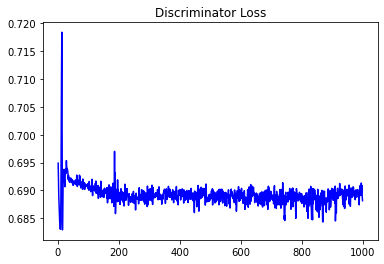

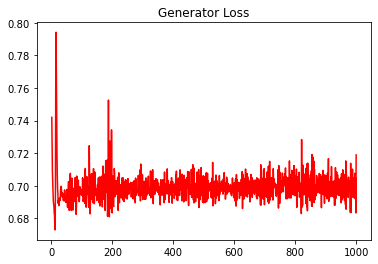

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.2298585038496397


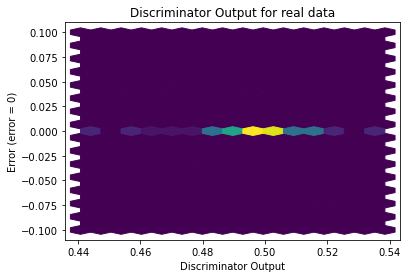

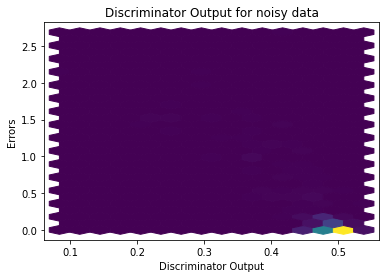

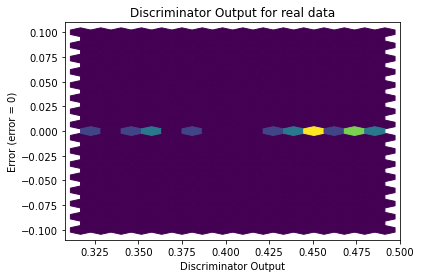

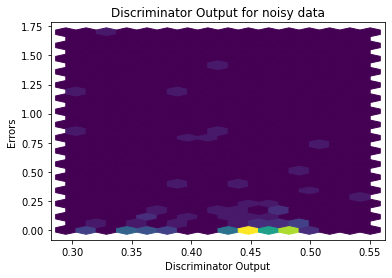

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


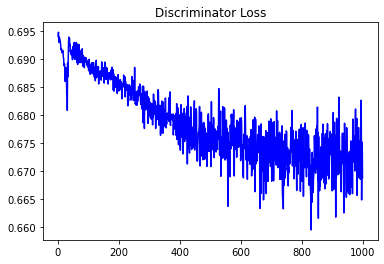

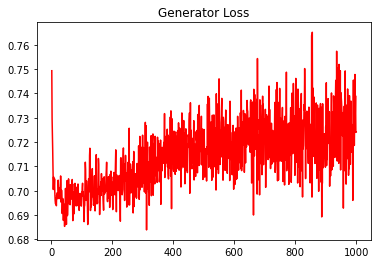

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2377997336458065


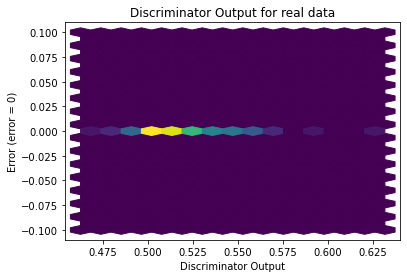

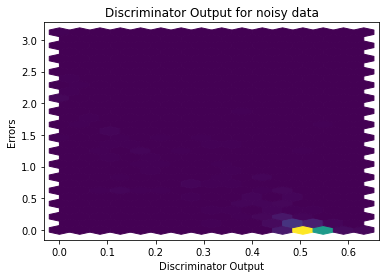

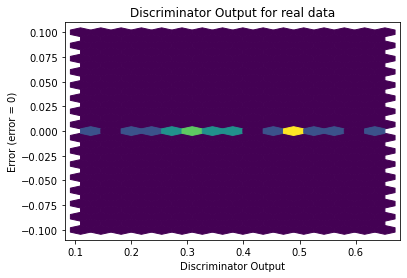

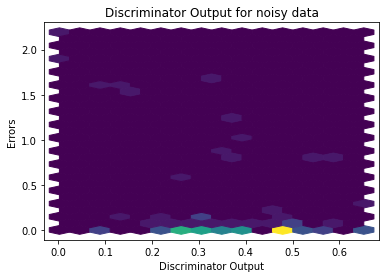

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.5416]], requires_grad=True)
